#  Géolocalisation pour une source mobile 

---

# 1 - Formulation

**On cherche à déterminer la position horizontale du flotteur en travaillant avec une source mobile (tractée par un navire). Nous n'avons plus plusieurs sources i émettant à un instant donné, mais une unique source émettant à plusieurs instants j. **

---
Les **variables connues** sont : 

- $\underline{x}_s^j$ : la position horizontale de la bouée de surface de la source à la j$^{ème}$ émission.
- $t_e^j$ : le temps de la j$^{ème}$ émission de la source.
- $\tilde{t}_r^i$ : temps de réception, par le flotteur, du j$^{ème}$ signal.
- $\epsilon_i$ : détection du signal, $\epsilon_i=1$ (détection) ou $0$ (pas de détection). Dans un soucis de simplicité, on considère $\epsilon_i=1$ pour tous les exemples suivants.
- $v_t$ : vitesse du navire tractant la source, donc vitesse de la source.
- $z$ : profondeur du flotteur, grâce à un capteur de pression, pas utilisé pour le moment.

Une connaissance "parfaite" est supposée pour toutes les variables connues. Cela revient à considérer l'amplitude de leurs erreurs respectives comme négligeables.

---
Les **variables inconnues** sont:

- $\underline{x}(t_0)$ : position du flotteur à l'instant t_0 de la 1ère émission de la source.

- $\delta \underline{x}^j$ : vecteur différence entre la position de la bouée de surface de la source et la position du transducteur. $\delta \underline{x}^j = \underline{x}_t^j - \underline{x}_s^j$

- $\delta t$ : offset sur l'horloge du flotteur, $\delta t = \tilde{t}_r^i - t_r^i$, où 
$t_r^i$ est le temps exact de réception.

- $\delta t_p (\underline{x}^j,\underline{x}_t^j) $ : différence, à l'instant j, entre le temps de propagation source-récepteur réel ($\tilde{t}_r^j - \delta t  - t_e^j$) et le temps de propagation estimé a priori $t_p(\underline{x}^j,\underline{x}_t^j)$. Par simplicité, on considère que le temps de propagation a priori dépend uniquement de la distance : $t_p(\underline{x}^j,\underline{x}_t^j) = t_p(|| \underline{x}^j - \underline{x}_t^j ||)$. Par exemple, en considérant une célérité a priori $c_b$, alors : $t_p(\underline{x}^j,\underline{x}_t^j) = || \underline{x}^j - \underline{x}_t^j || / c_b$.

---

Des estimations a priori pour $\underline{x}(t_0)$ et $v$ sont fournies. On les considère toutes égales à 0 pour le moment : $\underline{x}_b=(x=0km, y=0km)$ et $v_b = 0 m/s$.

Les écarts-types correspondants aux erreurs sur $\underline{x}(t_0)$, $v$, $\delta t$ et $\delta t_p(\underline{x}^j,\underline{x}_t^j)$ sont considérés comme connus et sont notés : $e_x$, $e_v$, $e_{\delta t}$ et $e_{tp}$.

---


**On cherche à déterminer la position du flotteur (à l'instant $t_0$), la vitesse $v$ du flotteur (considérée comme constante), ainsi que la dérive d'horloge grâce à la fonction de minimisation suivante :** 


$$
\begin{align*}
J(\underline{x}(t_0), v, \delta t) &= 
\frac {||\underline{x}(t_0) - \underline{x}_b||^2}{e_x^2} 
+ \frac{||v - v_b||^2} {e_v^2}
+ \frac{|| \delta t||^2} {e_{\delta t}^2}
+ \sum_j \epsilon_j \times \frac {\delta t(\underline{x}^j,\underline{x}_t^j)^2 } {e_{tp}^2} \\
&=
\frac {||\underline{x}(t_0) - \underline{x}_b||^2}{e_x^2} 
+ \frac{||v - v_b||^2} {e_v^2}
+ \frac{|| \delta t||^2} {e_{\delta t}^2}
+ \sum_j \epsilon_j \times \frac {\big [ \tilde{t}_r^j - \delta t  - t_e^j  -  t_p(\underline{x}^j,\underline{x}_t^j) \big ]^2 } {e_{tp}^2}
\end{align*}
$$


$$
\begin{align*}
\text{avec} \quad \quad \underline{x}^j = \underline{x}(t_0) + v(\tilde{t}_r^j - \delta t) \quad \quad \text{et} \quad \quad \underline{x}_t^j = \underline{x}_t + v_t(t_e^j) 
\end{align*}
$$

---

**Connaissant $x(t_0)$ et $v$, nous pouvons en déduire \underline{x} à tous les instants t : 
$ x(t) = x(t_0) + v \times t $.**

---


In [1]:
# this enable automatic reloading of libraries
%load_ext autoreload
%autoreload 2

# import libraries
import numpy as np
import matplotlib.pyplot as plt
from clib.geolocation_1Dv import *

---
---
# 2 - Initialisation de la source et du flotteur 

In [63]:
### création de la source (vitesse de 2.5 m/s)
sources=[]
sources.append(source( 0.e3, 0, v_x = 5.))
Ns = len(sources)

### création du récepeur (vitesse de 10cm/s)
r=receiver(10.e3, 0, e_x=10.e3, e_dt=0., v_x= 0.1)

### initialisation du mapping
pmap = xtmap(c_b=1500., e_t=None, e_min=1.e-3) 

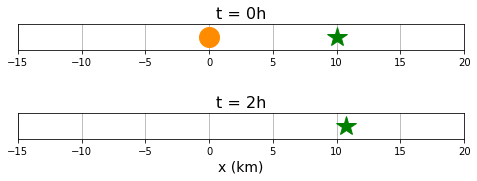

In [64]:
### plot
plt.figure(figsize=(8,3))
ax=plt.subplot(211)
[s.plot() for s in sources]
r.plot()
plt.ylim([-1, 1])
plt.xlim([-15.,20.])
ax.grid()
ax.set_aspect('equal')
ax.get_yaxis().set_visible(False)
plt.title("t = 0h", fontsize=16)

ax1=plt.subplot(212)
[s.plot(t=2.*3600.) for s in sources]
r.plot(t=2.*3600.)
plt.ylim([-1, 1])
plt.xlim([-15.,20.])
ax1.grid()
ax1.set_aspect('equal')
ax1.get_yaxis().set_visible(False)
plt.title("t = 2h", fontsize=16)
plt.xlabel('x (km)', fontsize=14)

plt.show()
#plt.savefig('geoloc1D', dpi=100)

---
**- Incertitudes a priori :**

In [65]:
print("e_dx  = %.1f m     (incertitude sur la position du transducteur)" %sources[0].e_dx)
print("e_x   = %.1f m  (incertitude sur la position du flotteur)" %r.e_x)
print("e_v   = %.1f m/s    (incertitude sur la vitesse du flotteur)"%r.e_v)

e_dx  = 10.0 m     (incertitude sur la position du transducteur)
e_x   = 10000.0 m  (incertitude sur la position du flotteur)
e_v   = 0.1 m/s    (incertitude sur la vitesse du flotteur)


---
**- Distance horizontale bouée-transducteur ($\delta \underline{x}^j$) qui reste inchangée durant l'ensemble des simulations :**

In [66]:
print("dx  = %.2f m" %[s.dx for s in sources][0])

dx  = -0.51 m


---
---
# 2 - Calculs de géolocalisation

---
**- Temps d'émission de la source (en secondes): toutes les 2min pendant 1h**

In [67]:
t_e = np.arange(0.,3600.,2.*60.)
print(t_e)

[   0.  120.  240.  360.  480.  600.  720.  840.  960. 1080. 1200. 1320.
 1440. 1560. 1680. 1800. 1920. 2040. 2160. 2280. 2400. 2520. 2640. 2760.
 2880. 3000. 3120. 3240. 3360. 3480.]


---
**- Minimisation : **

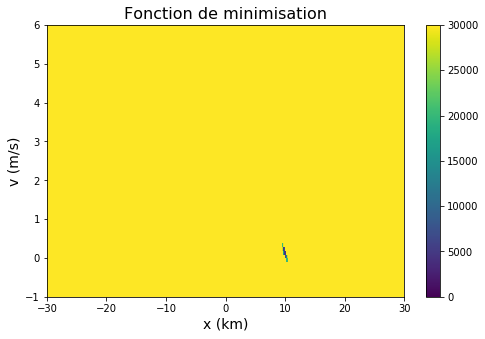

In [68]:
_t = []
for t in t_e : 
    x, y = r.get_xy(t)
    x_s, y_s = sources[0].get_xy(t)
    rg = np.sqrt((x-x_s)**2 + (y - y_s)**2)
    _t.append(t + pmap.draw_t(rg))

r.t_r_tilda = np.array(_t+r.dt).squeeze()
x, v, dt, success, message, res, J = geolocalize_xtmap_1Dv(r, sources, t_e, pmap, clock_drift=False, \
                                                        plot_min=True) #, x0 = np.array([1500.,0.1]))

---
### Minimum de la fonction sur la grille de calcul : 

On obtient le bon résultat.

In [69]:
f_grd2D = np.load('f_grd2D.npy')

In [70]:
### grille de calcul de la minimisation
xy_sc = 1.e3
v_sc = 0.1
x_grd = np.linspace(-30.e3, 30.e3, 601.) / xy_sc
v_grd = np.linspace(-1,6,71.) / v_sc

### minimum de la fonction 
idx =  np.where(f_grd2D == np.min(f_grd2D))
print('idx : ', idx)
print('x_min : %.1f km' %x_grd[idx[0]])
print('v_min : %.1f m/s' %(v_grd[idx[1]]*v_sc))

idx :  (array([400]), array([11]))
x_min : 10.0 km
v_min : 0.1 m/s


---
### Résultats de geolocalize_xtmap_1Dv : 

La fonction "minimize" choisit le mauvais minimum, avec une vitesse de presque 5m/s et une position symétrique, par rapport à la source, de la position réelle. 

In [71]:
print ("Position réelle du flotteur        : %.3f m" %r.x)
print ("Position estimée par minimisation  : %.3f m" %x)
print ("Erreur sur le positionnement       : %.3f m" % abs(r.x - x))
print ("\nVitesse réelle du flotteur         : %.3f cm/s" %(r.v_x*100.))
print ("Vitesse estimée par minimisation   : %.3f cm/s" %(v*100.))
print ("Erreur sur la vitesse du flotteur  : %.3f cm/s" % (abs(r.v_x - v)*100.))

Position réelle du flotteur        : 10000.000 m
Position estimée par minimisation  : 9999.430 m
Erreur sur le positionnement       : 0.570 m

Vitesse réelle du flotteur         : 10.000 cm/s
Vitesse estimée par minimisation   : 10.011 cm/s
Erreur sur la vitesse du flotteur  : 0.011 cm/s


---
---
### Si x0 est plus proche de la solution réelle : 

Si x0 est fixé assez proche de la solution réelle (ici 1.5km pour une position réelle à 10km), les résultats de la minimisation sont ok. 

In [40]:
_t = []
for t in t_e : 
    x, y = r.get_xy(t)
    x_s, y_s = sources[0].get_xy(t)
    rg = np.sqrt((x-x_s)**2 + (y - y_s)**2)
    _t.append(t + pmap.draw_t(rg))

r.t_r_tilda = np.array(_t+r.dt).squeeze()
x, v, dt, success, message, res = geolocalize_xtmap_1Dv(r, sources, t_e, pmap, clock_drift=False, \
                                                        x0 = np.array([1500.,0.1]))

In [41]:
print ("Position réelle du flotteur        : %.3f m" %r.x)
print ("Position estimée par minimisation  : %.3f m" %x)
print ("Erreur sur le positionnement       : %.3f m" % abs(r.x - x))
print ("\nVitesse réelle du flotteur         : %.3f cm/s" %(r.v_x*100.))
print ("Vitesse estimée par minimisation   : %.3f cm/s" %(v*100.))
print ("Erreur sur la vitesse du flotteur  : %.3f cm/s" % (abs(r.v_x - v)*100.))

Position réelle du flotteur        : 10000.000 m
Position estimée par minimisation  : 9999.708 m
Erreur sur le positionnement       : 0.292 m

Vitesse réelle du flotteur         : 10.000 cm/s
Vitesse estimée par minimisation   : 10.002 cm/s
Erreur sur la vitesse du flotteur  : 0.002 cm/s


---
---
---
### Variation du signe des vitesses (source et flotteur)

In [49]:
### création de la source (vitesse de 2.5 m/s)
sources_neg=[]
sources_neg.append(source( 0.e3, 0, v_x = -2.5))
Ns = len(sources)

In [50]:
pmap = xtmap(c_b=1500., e_t=1.e-3) 
print("e_tp   = %.1f ms    (incertitude sur le temps d'arrivée)" %(pmap.e_tp(0.)*1000.))

e_tp   = 1.0 ms    (incertitude sur le temps d'arrivée)


In [51]:
L = 120.* 1.e3
X = np.linspace(-L/2.,L/2.,241)  # resolution : 1km
Y = 0. 

In [ ]:
Nmc = 10           # number of simulations

# v_source positive, v_flotteur positive
RMS_pp, BiasX_pp, _ = transect (sources, X, Y, Nmc, t_e, pmap, v_x=0.1, clock_drift = False ) 
# v_source negative, v_flotteur positive
RMS_np, BiasX_np, _ = transect (sources_neg, X, Y, Nmc, t_e, pmap, v_x=0.1, clock_drift = False ) 
# v_source positive, v_flotteur negative
RMS_pn, BiasX_pn, _ = transect (sources, X, Y, Nmc, t_e, pmap, v_x=-0.1, clock_drift = False ) 
# v_source negative, v_flotteur negative
RMS_nn, BiasX_nn, _ = transect (sources_neg, X, Y, Nmc, t_e, pmap, v_x=-0.1, clock_drift = False ) 

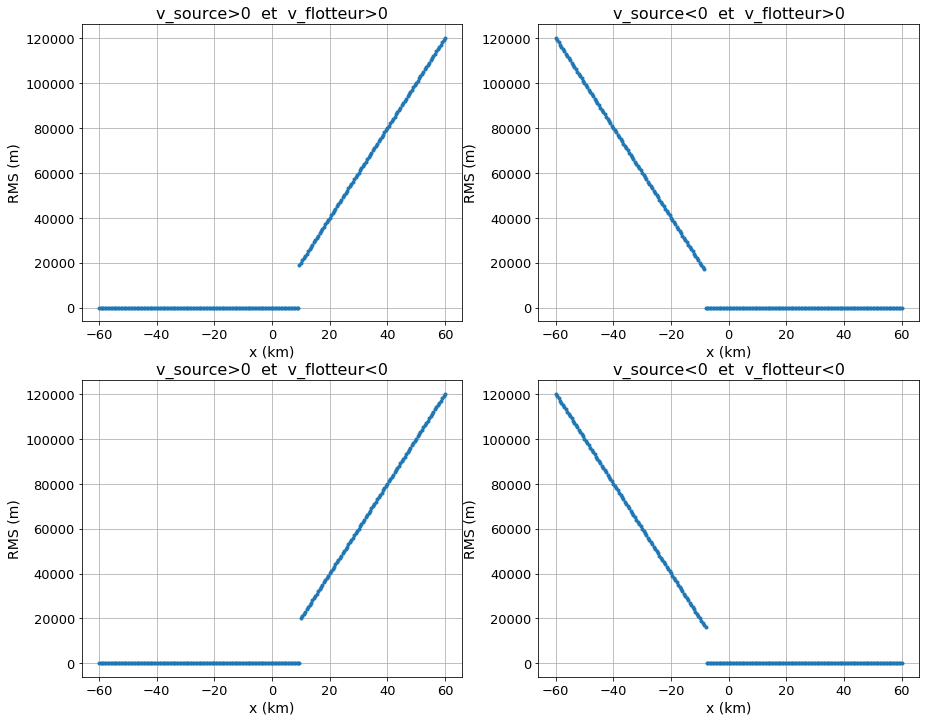

In [59]:
plt.figure(figsize=(15,12))
## plot rms result
plt.subplot(221)
plt.plot(X/1.e3, RMS_pp, '.') 
plt.xlabel('x (km)', fontsize=14)
plt.ylabel('RMS (m)', fontsize=14)
plt.title('v_source>0  et  v_flotteur>0', fontsize=16 )
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid()

plt.subplot(222)
plt.plot(X/1.e3, RMS_np, '.') 
plt.xlabel('x (km)', fontsize=14)
plt.ylabel('RMS (m)', fontsize=14)
plt.title('v_source<0  et  v_flotteur>0', fontsize=16 )
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid()

plt.subplot(223)
plt.plot(X/1.e3, RMS_pn, '.') 
plt.xlabel('x (km)', fontsize=14)
plt.ylabel('RMS (m)', fontsize=14)
plt.title('v_source>0  et  v_flotteur<0', fontsize=16 )
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid()

plt.subplot(224)
plt.plot(X/1.e3, RMS_nn, '.') 
plt.xlabel('x (km)', fontsize=14)
plt.ylabel('RMS (m)', fontsize=14)
plt.title('v_source<0  et  v_flotteur<0', fontsize=16 )
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid()

#plt.show()
plt.savefig('variation_signe_vitesses', dpi=100)

---
---
---
### Nouvelle méthode en fixant x0 proche des deux solutions

In [41]:
_t = []
for t in t_e : 
    x, y = r.get_xy(t)
    x_s, y_s = sources[0].get_xy(t)
    rg = np.sqrt((x-x_s)**2 + (y - y_s)**2)
    _t.append(t + pmap.draw_t(rg))

r.t_r_tilda = np.array(_t+r.dt).squeeze()
x1, v1, dt1, success1, message1, res1, J1 = geolocalize_xtmap_1Dv(r, sources, t_e, pmap, clock_drift=False, \
                                                         x0 = np.array([r.x,0.]))

x2,v2, dt2, success2, message2, res2, J2 = geolocalize_xtmap_1Dv(r, sources, t_e, pmap, clock_drift=False, \
                                                x0 = np.array([(sources[0].x_s - r.x) + sources[0].x_s,0.]))

if J1 == J2 : 
    print("Erreur : J1 = J2")
elif J1 < J2 : 
    x, v, dt, success, message, res, J = x1, v1, dt1, success1, message1, res1, J1
else : 
    x, v, dt, success, message, res, J = x2, v2, dt2, success2, message2, res2, J2

In [42]:
print ("Position réelle du flotteur        : %.3f m" %r.x)
print ("Position estimée par minimisation  : %.3f m" %x)
print ("Erreur sur le positionnement       : %.3f m" % abs(r.x - x))
print ("\nVitesse réelle du flotteur         : %.3f cm/s" %(r.v_x*100.))
print ("Vitesse estimée par minimisation   : %.3f cm/s" %(v*100.))
print ("Erreur sur la vitesse du flotteur  : %.3f cm/s" % (abs(r.v_x - v)*100.))

Position réelle du flotteur        : 10000.000 m
Position estimée par minimisation  : 9999.304 m
Erreur sur le positionnement       : 0.696 m

Vitesse réelle du flotteur         : 10.000 cm/s
Vitesse estimée par minimisation   : 10.016 cm/s
Erreur sur la vitesse du flotteur  : 0.016 cm/s


In [49]:
#estimé
x_estim = x + v * (t_e - r.t0)
#position exacte
x_real = r.x + r.v_x * (t_e - r.t0)
#erreur
dx = x_real - x_estim
print(dx)

[0.69556813 0.67650603 0.65744394 0.63838185 0.61931976 0.60025767
 0.58119557 0.56213348 0.54307139 0.5240093  0.5049472  0.48588511
 0.46682302 0.44776093 0.42869884 0.40963674 0.39057465 0.37151256
 0.35245047 0.33338838 0.31432628 0.29526419 0.2762021  0.25714001
 0.23807791 0.21901582 0.19995373 0.18089164 0.16182955 0.14276745]


In [ ]:

###############################################################################
############################## FIN DES TESTS ##################################
###############################################################################


---
---
---
---
# 3 - Calculs des transects 

---
**- Création du transect : **

In [43]:
L = 120.* 1.e3
X = np.linspace(-L/2.,L/2.,241)  # resolution : 1km
Y = 0. 

---
**- Initialisation du mapping (choix de l'erreur e_tp) : **

In [44]:
pmap = xtmap(c_b=1500., e_t=1.e-3) 
print("e_tp   = %.1f ms    (incertitude sur le temps d'arrivée)" %(pmap.e_tp(0.)*1000.))

e_tp   = 1.0 ms    (incertitude sur le temps d'arrivée)


---
**- Simulations (choix de la dérive d'horloge) : **

In [45]:
Nmc = 10         # number of simulations
RMS_t, BiasX_t, _ = transect (sources, X, Y, Nmc, t_e, pmap, v_x=0.1, clock_drift = False) 

FloatProgress(value=0.0, description='Loading :')

No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations


In [47]:
Nmc = 10         # number of simulations
RMS_tnew, BiasX_tnew, _ = transect (sources, X, Y, Nmc, t_e, pmap, v_x=0.1, clock_drift = False, \
                             new_method=True) 

FloatProgress(value=0.0, description='Loading :')

No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more

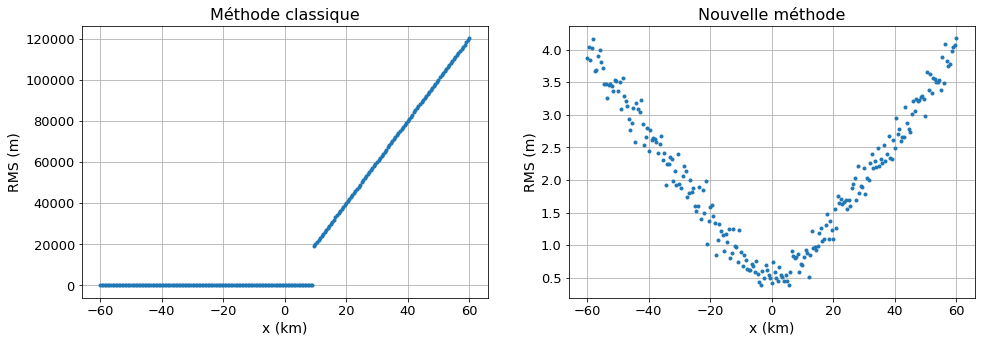

In [48]:
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.plot(X/1.e3, RMS_t, '.') 
plt.xlabel('x (km)', fontsize=14)
plt.ylabel('RMS (m)', fontsize=14)
plt.title('Méthode classique', fontsize=16 )
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid()

plt.subplot(122)
plt.plot(X/1.e3, RMS_tnew, '.')
plt.xlabel('x (km)', fontsize=14)
plt.ylabel('RMS (m)', fontsize=14)
plt.title('Nouvelle méthode', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid()

plt.show()